# Brief illustration of Shock Calculator

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# some imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../radiative_shock/")
import radiative_shock_calculator as rsc

In [3]:
# helper routine to illustrate shock structure
def plot_shock_structure(shock):
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(131)
    ax.plot(shock.x, shock.T, label=r"$T$")
    ax.plot(shock.x, shock.theta, ls="dashed", label=r"$\theta$")
    ax.set_xlabel("x")
    ax.set_ylabel(r"$T, \theta$")
    ax.legend(frameon=False)
    ax = fig.add_subplot(132)
    ax.plot(shock.x, shock.M)
    ax.set_xlabel("x")
    ax.set_ylabel(r"$M$")
    ax.set_title(r"$M={:.2f}$".format(shock.M[0]))
    ax = fig.add_subplot(133)
    ax.plot(shock.x, shock.rho)
    ax.set_xlabel("x")
    ax.set_ylabel(r"$\rho$")

## Adopt examples from Lowire & Edwards 2008

In [4]:
# Defintion of basic non-dimensionalisation parameters; adopted from Lowrie & Edwards 2008
gamma = 5./3.
P0 = 1e-4
sigma = 1e6
kappa = 1

In [5]:
# Define a number of example shocks, mostly taken from Lowrie & Edwards 2008
LE08_M1p05 = rsc.noneqdiff_shock_calculator(1.05, P0, kappa, sigma, gamma=gamma)
LE08_M1p05_shock = LE08_M1p05.calculate_shock_structure(xmin=-0.015, xmax=0.015)

LE08_M1p2 = rsc.noneqdiff_shock_calculator(1.2, P0, kappa, sigma, gamma=gamma)
LE08_M1p2_shock = LE08_M1p2.calculate_shock_structure(xmin=-0.01, xmax=0.01)

LE08_M1p4 = rsc.noneqdiff_shock_calculator(1.4, P0, kappa, sigma, gamma=gamma)
LE08_M1p4_shock = LE08_M1p4.calculate_shock_structure(xmin=-0.01, xmax=0.01)

LE08_M2 = rsc.noneqdiff_shock_calculator(2, P0, kappa, sigma, gamma=gamma)
LE08_M2_shock = LE08_M2.calculate_shock_structure(xmin=-0.01, xmax=0.01)

LE08_M3 = rsc.noneqdiff_shock_calculator(3, P0, kappa, sigma, gamma=gamma)
LE08_M3_shock = LE08_M3.calculate_shock_structure(xmin=-0.01, xmax=0.005)

LE08_M5 = rsc.noneqdiff_shock_calculator(5, P0, kappa, sigma, gamma=gamma)
LE08_M5_shock = LE08_M5.calculate_shock_structure(xmin=-0.04, xmax=0.01)

LE08_M27 = rsc.noneqdiff_shock_calculator(27, P0, kappa, sigma, gamma=gamma, eps=1e-5)
LE08_M27_shock = LE08_M27.calculate_shock_structure(xmin=-0.25, xmax=0.05)

LE08_M30 = rsc.noneqdiff_shock_calculator(30, P0, kappa, sigma, gamma=gamma, eps=1e-8, epsasp=1e-5, Msamples=4096)
LE08_M30_shock = LE08_M30.calculate_shock_structure(xmin=-0.25, xmax=0.05)

LE08_M50 = rsc.noneqdiff_shock_calculator(50, P0, kappa, sigma, gamma=gamma, eps=1e-3, epsasp=1e-4)
LE08_M50_shock = LE08_M50.calculate_shock_structure(xmin=-0.25, xmax=0.05)

LE08_M70 = rsc.noneqdiff_shock_calculator(70, P0, kappa, sigma, gamma=gamma, eps=1e-2, epsasp=1e-3, Msamples=2048)
LE08_M70_shock = LE08_M70.calculate_shock_structure(xmin=-0.25, xmax=0.05)

Precursor region
Relaxation region
changing sign of root
changing sign of root2
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
Continuous case: no embedded hydrodynamic shock


## Illustrating the Lowrie & Ewards 2008 shocks

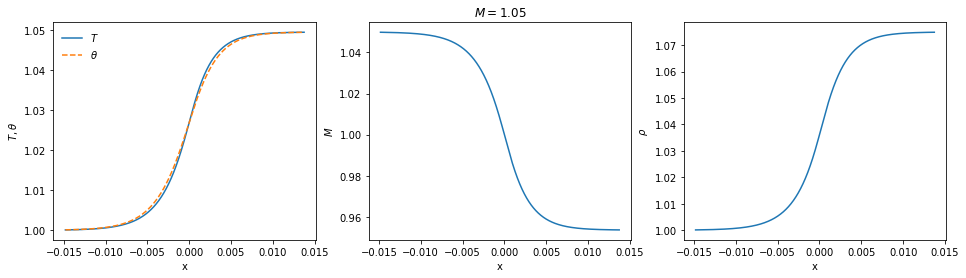

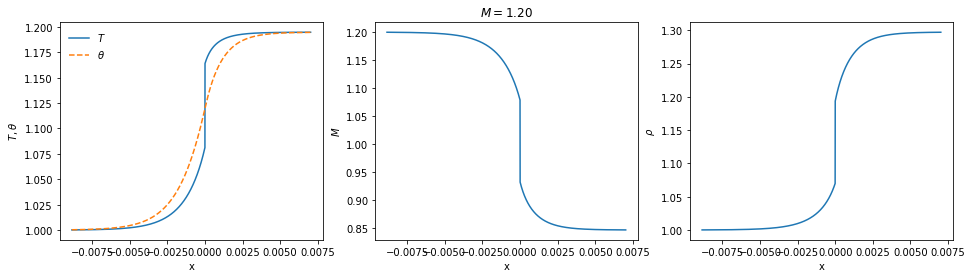

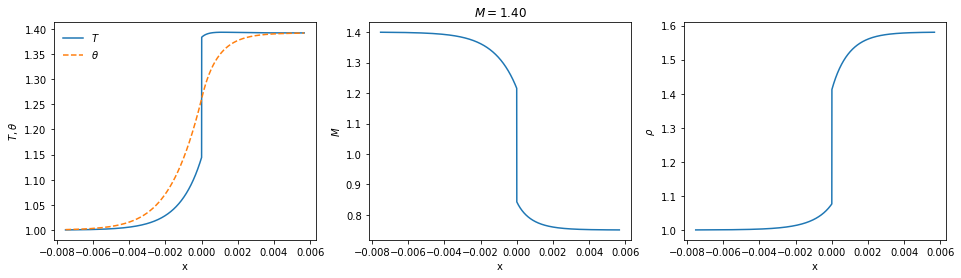

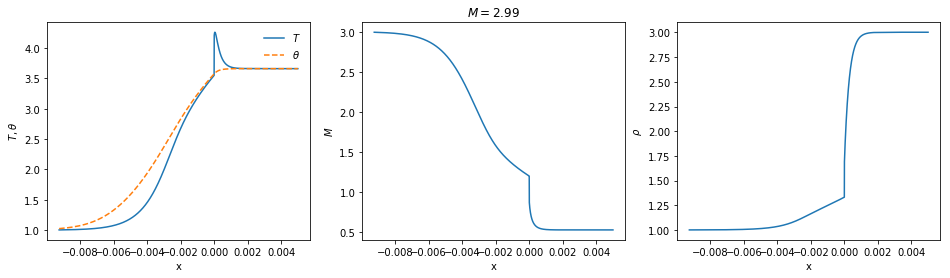

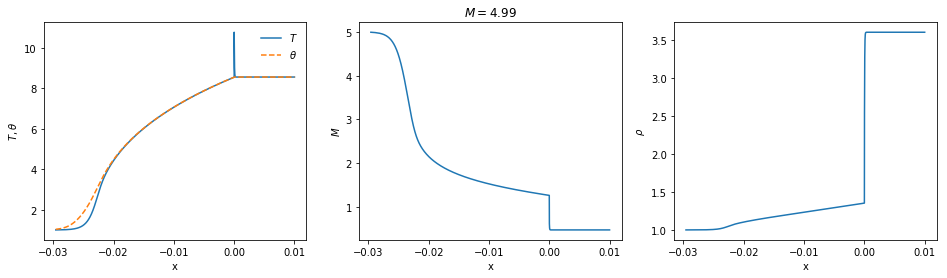

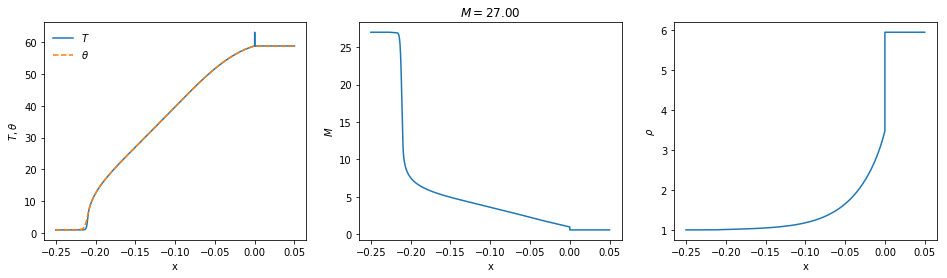

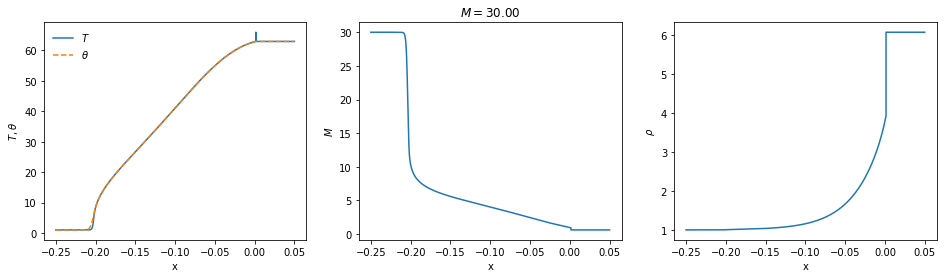

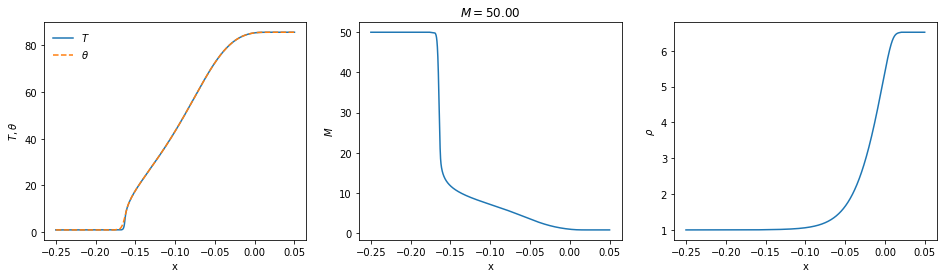

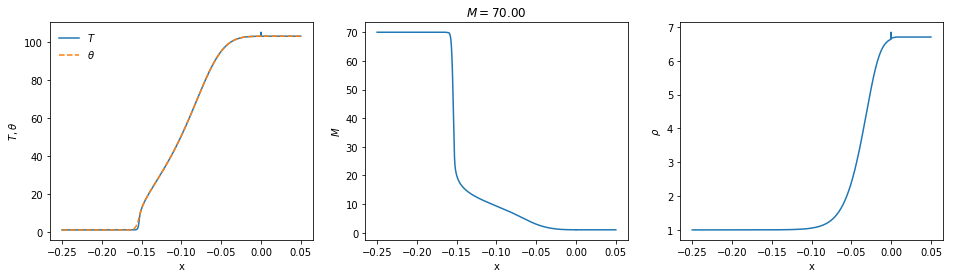

In [6]:
plot_shock_structure(LE08_M1p05_shock)
plot_shock_structure(LE08_M1p2_shock)
plot_shock_structure(LE08_M1p4_shock)
plot_shock_structure(LE08_M3_shock)
plot_shock_structure(LE08_M5_shock)
plot_shock_structure(LE08_M27_shock)
plot_shock_structure(LE08_M30_shock)
plot_shock_structure(LE08_M50_shock)
plot_shock_structure(LE08_M70_shock)

## Reproduce Figure 3 of Lowrie & Edwards 2008

In [7]:
eps = 1e-6
epsasp = 1e-6
epsrel = None
epsasprel = None
Msamples = 1024

M0samples = np.logspace(np.log10(1. + 1e-2), np.log10(80), 128)
M1samples = []
Mssamples = []
for i, M0test in enumerate(M0samples):

    test = rsc.noneqdiff_shock_calculator(M0test, 1e-4, 1, 1e6, eps=eps, epsasp=epsasp, Msamples=Msamples, epsrel=epsrel, epsasprel=epsasprel)
    shock = test.calculate_shock_structure()
    M1samples.append(test.M1)
    Mssamples.append(test.Ms)


Precursor region
Relaxation region
changing sign of root
changing sign of root2
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
changing sign of root
changing sign of root2
Discontinuous case: embe

Relaxation region
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Discontinuous case: embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Relaxation region
Continuous case: no embedded hydrodynamic shock
Precursor region
Rela

In [8]:
# include shock examples
shocks = [LE08_M1p05, LE08_M1p2, LE08_M1p4, LE08_M3, LE08_M5, LE08_M27, LE08_M30, LE08_M50, LE08_M70]

M0 = [shock.M0 for shock in shocks]
M1 = [shock.M1 for shock in shocks]
Ms = [shock.Ms for shock in shocks]

Text(0,0.5,'$M$')

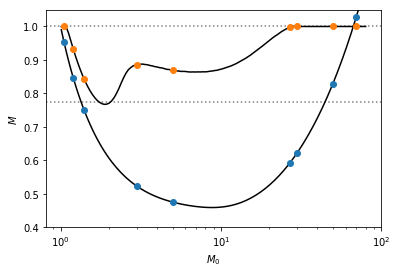

In [9]:
plt.figure()
plt.semilogx(M0samples, M1samples, color="black")
plt.semilogx(M0samples, Mssamples, color="black")
plt.semilogx(M0, M1, ls="", marker="o")
plt.semilogx(M0, Ms, ls="", marker="o")
plt.axhline(y=1./np.sqrt(gamma), ls="dotted", color="grey", zorder=-10)
plt.axhline(y=1., ls="dotted", color="grey", zorder=-10)
plt.ylim([0.4, 1.05])
plt.xlabel(r"$M_0$")
plt.ylabel(r"$M$")